# Differential tritium spectrum

#### Literature
See:  
Kleesiek, M., Behrens, J., Drexlin, G. et al.  
β-Decay spectrum, response function and statistical model for neutrino mass measurements with the KATRIN experiment.   
Eur. Phys. J. C 79, 204 (2019).   
https://doi.org/10.1140/epjc/s10052-019-6686-7


#### Exercises
* Take a look at the reference above

* Complete the code for the functions
    * fermi(): Fermi correction for beta decay
    * diffspec_base(): Differential tritium beta spectrum with 1 neutrino (you can leave out multiplicative constants)
    * diffspec_mixed(): Spectrum including two neutrinos (active + sterile)

* Plot the mixed spectrum for several combinations of $m_s$ and $\sin^2\theta$ to get a feel for how it behaves


#### General Jupyter Tips:
* Ctrl+Enter: Execute cell
* Shift+Enter: Execute cell and go to next cell
* ii: Interrupt cell execution
* 00: Restart Kernel
* If you don't know about some function, go into its bracket and press Shift+Tab for documentation

In [1]:
import numpy as np
import plotInterface as pi; pi.init()
import matplotlib.pyplot as plt

### Function definition

In [2]:
#-------------------------------------------------------------------------------------------------
# D.H. Wilkinson, Small terms in the beta-decay spectrum of tritium, Nucl. Phys. A 526 (1991) 131.
# or https://iopscience.iop.org/article/10.1088/0034-4885/71/8/086201

M_ELECTRON = 510998.95        # electron mass, eV
ALPHA      = 7.2973525698e-3  # fine-structure constant
ENDPOINT   = 18575            # endpoint energy, eV
A_CONST    = 1.002037         # constant, see reference
B_CONST    = 0.001427         # constant, see reference
Z_DAUGHTER = 2                # daughter nucleus charge

def fermi(ekin,Z=Z_DAUGHTER):
    """ 
    Fermi function (unscreened coulomb field)
    
    Parameters:
      Z    : Atomic charge of daughter nucleus
      ekin : Kinetic energy of electron in eV (>0)
    
    Returns:
      Fermi correction factor    
    """
    
    # total energy
    etot = ekin + M_ELECTRON
    
    # relativistic beta
    beta = np.sqrt(1 - (M_ELECTRON/(etot))**2)
    
    # Sommerfeld parameter eta
    eta = ALPHA*Z/beta
    
    # non-relativistic fermi correction    
    fermicorr = 2*np.pi*eta/(1-np.exp(-2*np.pi*eta))
    
    # relativistic approximation
    fermicorr = fermicorr * (A_CONST-B_CONST*beta)
    
    return fermicorr


def diffspec_base(ekin, mnu=0):
    
    '''
    Differential tritium spectrum with 
    fermi correction (relativistic approximation).
    
      ekin : Kinectic energy of electron in eV
      mnu  : Neutrino mass in eV 
    '''
    
    # convert types for convenience
    if type(ekin)==float or type(ekin)==int:
        ekin = np.array([ekin])
    
    # initialize output spectrum array
    spec = np.zeros(len(ekin))
    
    # restrict to non-zero region
    nz = (ekin>0) & (ekin<(ENDPOINT-mnu))
    ekin = ekin[nz]
    
    # electron total energy
    ee = (ekin+M_ELECTRON)
    
    # neutrino total energy
    enu = ENDPOINT-ekin
    
    # electron momentum
    pe = np.sqrt((ekin+M_ELECTRON)**2 - M_ELECTRON**2)
    
    # neutrino momentum
    pnu = np.sqrt((ENDPOINT-ekin)**2-mnu**2)

    # fermicorrection
    fermicorr = fermi(ekin)

    # the spectrum
    spec[nz] = fermicorr*ee*enu*pe*pnu*np.heaviside(ekin,1)
    
    return spec


def diffspec_mixed(ekin, mActive=0, mSterile=0, sin2theta=0):
    '''
    Differential tritium spectrum with 
    active and sterile component.
    
      ekin      : Kinectic energy of electron in eV
      mActive   : Active neutrino mass in eV (usually 0) 
      mSterile  : Sterile neutrino mass in eV
      sin2theta : Sterile mixing amplitude
    '''
    
    # active neutrino shape
    active = (1-sin2theta)*diffspec_base(ekin,mnu=mActive)
    
    # sterile neutrino shape
    sterile = (sin2theta)*diffspec_base(ekin,mnu=mSterile)
    
    # sum according to mixing amplitude
    spec = active + sterile
    
    return spec

### Plotting

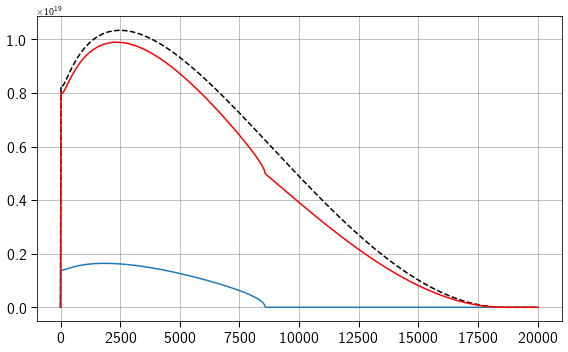

In [3]:
e = np.linspace(0,20000,1000)

x = diffspec_base(e)
y = diffspec_base(e,mnu=10000)*0.2
z = diffspec_mixed(e,mActive=0,mSterile=10000,sin2theta=0.2)

plt.plot(e,x, color='k', ls='dashed')
plt.plot(e,y)
plt.plot(e,z, color='r')

# Helpful function for easy and nice looking plot
# Can be used instead of plt.show().
# Go into brackets and press Shift + Tab for options. 
pi.plotty()